# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data) <br> <br>
    
2. [Lexicon Based Sentiment Analysis](#2.-Lexicon-Based-Sentiment-Analysis)

    2.1 [Vader](#2.1-Vader)<br>
        2.1.1 [Visualisations](#2.1.1-Visualisations)<br><br>
        
    2.2 [TextBlob](#2.2-TextBlob-Sentiment-Analyzer)<br>
        2.2.1 [Visualisations](#2.2.1-Visualisations)<br><br>
        
    2.3 [AFINN](#2.3-AFINN)<br>
        2.3.1 [Visualisations](#2.3.1-Visualisations)<br>
        2.3.2 [Normalised AFINN](#2.3.2-Normalised-AFINN)


## 1. Importing Data & Libraries

### 1.1 Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# AFINN
from afinn import Afinn

# Scaler
from sklearn.preprocessing import MinMaxScaler

# External files
import preproc_functions
import lexicon_based



pd.set_option('display.max_columns', None)

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Veryfying if the functions of the external py files were imported**

In [2]:
functions = [func for func in dir(lexicon_based) if callable(getattr(lexicon_based, func))]

# Print the list of functions
print("Functions in the external module:")
for func in functions:
    print(func)

Functions in the external module:
SentimentIntensityAnalyzer
TextBlob
plot_sentiment_histograms
textblob_sa
vader_algorithm


### 1.2 Data

In [3]:
dataset = pd.read_csv('/Users/antoniooliveira/MannheimWMProject/processed_data.csv')

In [4]:
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2,Flight amazing. The crew onboard flight welcom...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0,Booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2,Excellent performance fronts. I would definite...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2,Pretty comfortable flight considering I flying...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2,The service consistently good start finish. Th...


## 2. Lexicon Based Sentiment Analysis

**Sorting the observations by sentiment, and saving them in sorted_sentiment**

In [5]:
sorted_sentiment = sorted(dataset['Sentiment'].unique())

### 2.1 Vader

**Applying Vader on the preprocessed column** *Reviews_1*

In [6]:
dataset["vader_polarity_compound"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review)))

dataset["vader_polarity_scores"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review), compound = False))

Grouping observations by their polarity

In [7]:
dataset.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.252487,0.671934,-0.9928,-0.847675,-0.52785,0.4019,0.9953
1,1672.0,0.399248,0.646049,-0.9931,-0.120525,0.73305,0.9300,0.9964
2,3405.0,0.875072,0.256647,-0.9308,0.900100,0.95690,0.9779,0.9993


#### 2.1.1 Visualisations

**Polarity Histogram per Sentiment**

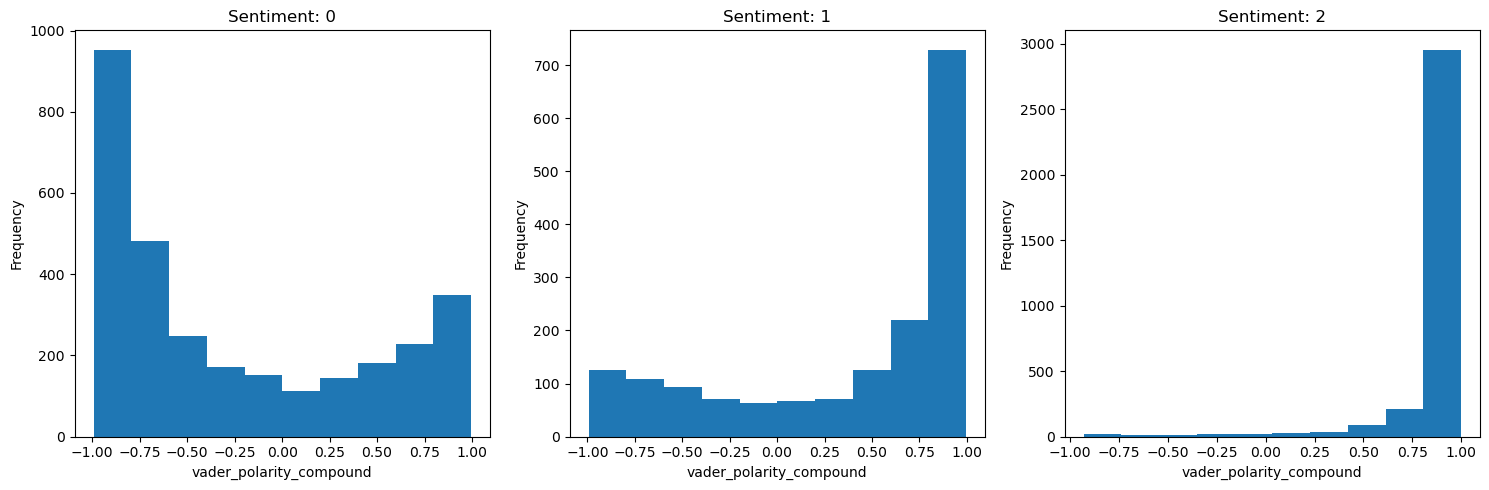

In [9]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'vader_polarity_compound')

**Polarity boxplots per Sentiment**

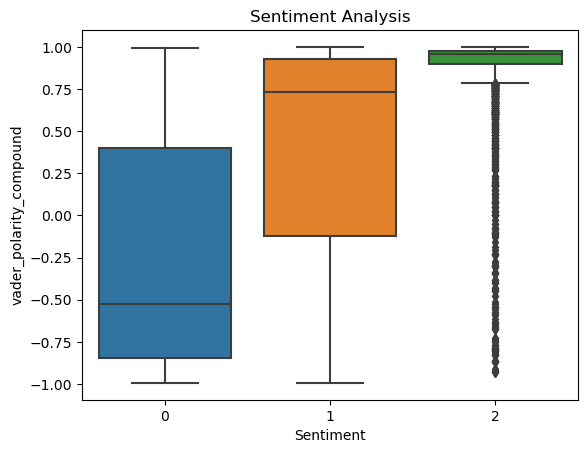

In [11]:
combined_data = pd.concat([dataset[dataset['Sentiment'] == sentiment] for sentiment in sorted_sentiment])

sns.boxplot(data=combined_data, x='Sentiment', y='vader_polarity_compound')
plt.title('Sentiment Analysis')
plt.show()

**Total Count histogram**

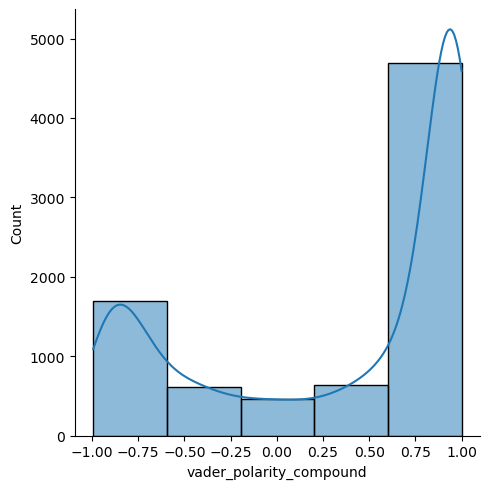

In [12]:
sns.displot(dataset["vader_polarity_compound"], kde=True, bins=5)
plt.show()

### 2.2 TextBlob Sentiment Analyzer

**Applying TextBlob on the preprocessed column** *Reviews_1*

In [13]:
dataset["textblob_polarity_compound"] = dataset["Reviews_1"].apply(lambda song : lexicon_based.textblob_sa(str(song)))

Grouping observations by their polarity

In [14]:
dataset.groupby('Sentiment')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.024396,0.181879,-1.000000,-0.116667,-0.009902,0.078085,1.0
1,1672.0,0.112089,0.170221,-1.000000,0.014012,0.114794,0.212289,0.8
2,3405.0,0.321930,0.163338,-0.666667,0.219331,0.315278,0.417500,1.0


#### 2.2.1 Visualisations

**Polarity Histogram per Sentiment**

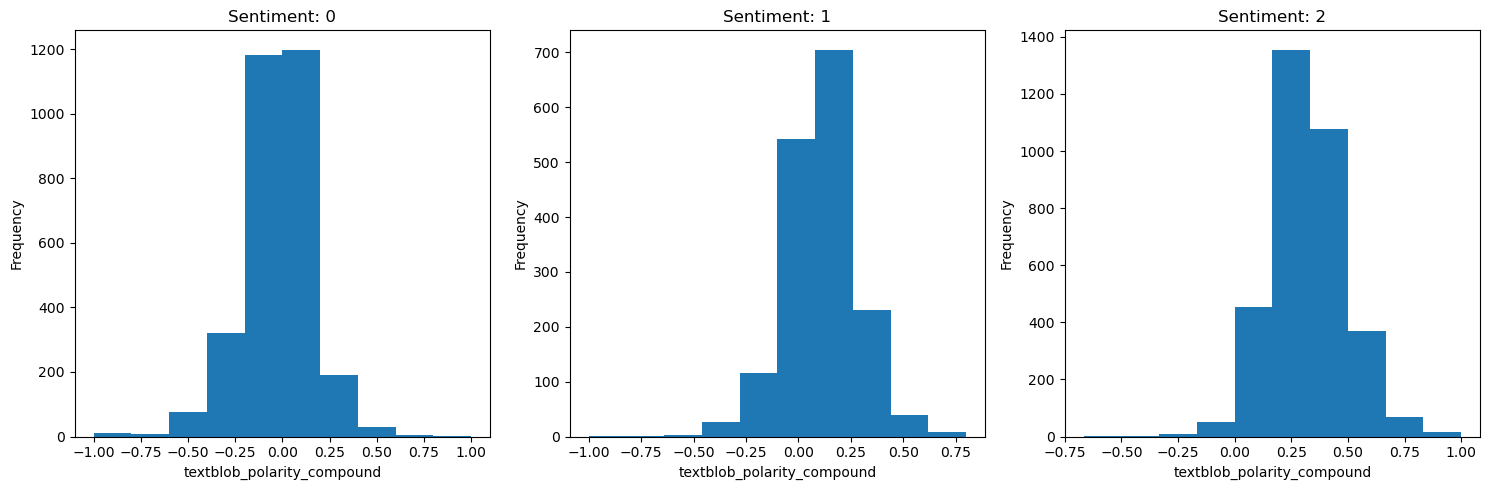

In [16]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'textblob_polarity_compound')

**Polarity boxplots per Sentiment**

In [17]:
sns.boxplot(data=combined_data, x='Sentiment', y='textblob_polarity_compound')
plt.title('Sentiment Analysis')
plt.show()

ValueError: Could not interpret input 'textblob_polarity_compound'

**Total Count histogram**

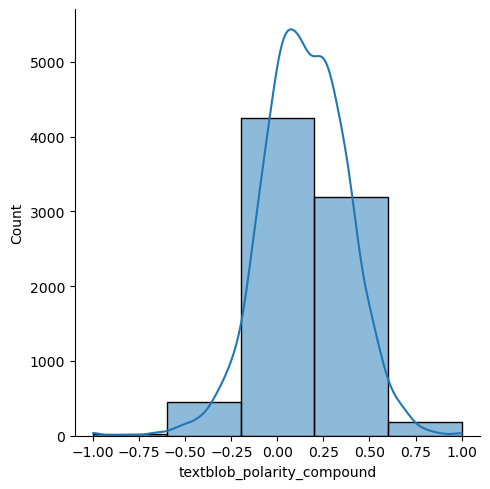

In [18]:
sns.displot(dataset["textblob_polarity_compound"], kde=True, bins=5)
plt.show()

### 2.3 AFINN

**Applying AFINN on the preprocessed column** *Reviews_1*

In [19]:
afinn = Afinn()

dataset['Afinn_polarity_compound'] = dataset['Reviews_1'].apply(lambda x: 
                                              afinn.score(x))

Grouping observations by their polarity

In [20]:
dataset.groupby('Sentiment')['Afinn_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-4.011582,7.902011,-46.0,-8.0,-4.0,0.0,51.0
1,1672.0,4.867823,9.389624,-36.0,-1.0,4.0,10.0,45.0
2,3405.0,14.209985,9.557496,-16.0,8.0,13.0,19.0,108.0


#### 2.3.1 Visualisations

**Polarity Histogram per Sentiment**

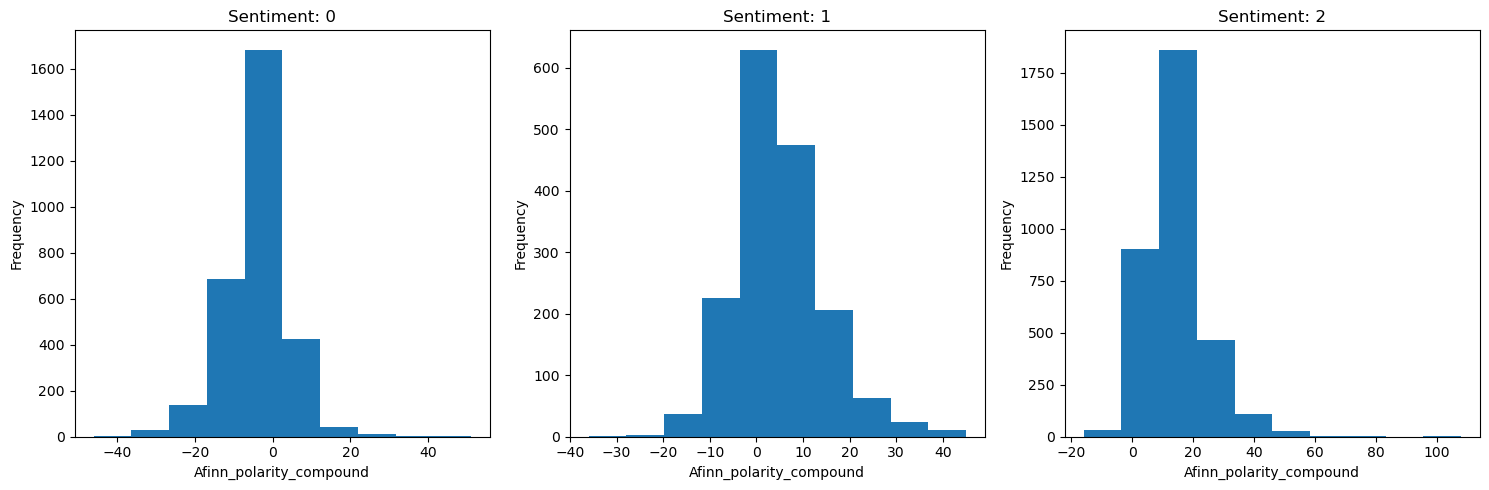

In [21]:
lexicon_based.plot_sentiment_histograms(dataset, sorted_sentiment, 'Afinn_polarity_compound')

**Polarity boxplots per Sentiment**

In [22]:
sns.boxplot(data=combined_data, x='Sentiment', y='Afinn_polarity_compound')
plt.title('Sentiment Analysis')
plt.show()

ValueError: Could not interpret input 'Afinn_polarity_compound'

**Total Count histogram**

In [ ]:
sns.displot(dataset["Afinn_polarity_compound"], kde=True, bins=5)
plt.show()

#### 2.3.2 Normalised AFINN

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1))

afinn_normalized_polarity = scaler.fit_transform(dataset["Afinn_polarity_compound"].to_numpy().reshape(-1, 1))

In [ ]:
dataset["Afinn_normalized_polarity"] = afinn_normalized_polarity.reshape(-1)
dataset[['Reviews_1', 'Afinn_polarity_compound', 'Afinn_normalized_polarity']].describe()

In [ ]:
# Loop through sorted unique tags
for sentiment_ in sorted_sentiment:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {sentiment_}')
    random_functions.histogram(dataset[dataset['Sentiment'] == sentiment_]['Afinn_normalized_polarity'])
    print('')


In [ ]:
# Loop through sorted sentiment values
for sentiment in sorted_sentiment:
    # Filter data for the current sentiment
    filtered_data = dataset[dataset['Sentiment'] == sentiment]
    
    # Plot the boxplot
    sns.boxplot(data=filtered_data, y="Afinn_normalized_polarity")
    plt.title(f'Sentiment {sentiment}')
    plt.show()

In [ ]:
sns.displot(dataset["Afinn_normalized_polarity"], kde=True, bins=5)
plt.show()

### 3. Comparing Methods

In [ ]:
compare = ['vader_polarity_compound', 'textblob_polarity_compound', 'Afinn_normalized_polarity']

In [ ]:
means_by_tag = dataset.groupby('Sentiment')[compare].mean()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
means_by_tag = dataset.groupby('Sentiment')[compare].max()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Max Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Max Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()